# Internet traffic attack recognition (DDosNet)

In [1]:
import os
import pandas as pd
import numpy as np
import torch

# Get the datasets from memory

In [2]:
csv_files = []
for dirname, _, filenames in os.walk('.\datasets\kaggle'):
    for filename in filenames:
        csv_file = os.path.join(dirname, filename)
        csv_files.append(csv_file)
        
csv_files

['.\\datasets\\kaggle\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 '.\\datasets\\kaggle\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 '.\\datasets\\kaggle\\Friday-WorkingHours-Morning.pcap_ISCX.csv',
 '.\\datasets\\kaggle\\Monday-WorkingHours.pcap_ISCX.csv',
 '.\\datasets\\kaggle\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 '.\\datasets\\kaggle\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 '.\\datasets\\kaggle\\Tuesday-WorkingHours.pcap_ISCX.csv',
 '.\\datasets\\kaggle\\Wednesday-workingHours.pcap_ISCX.csv']

In [3]:
df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
df.columns = df.columns.str.strip()
print("Original length of df:", len(df))

Original length of df: 2830743


## Tidy up the dataset

In [4]:
df.describe()
#df.info()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [5]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
print("After dropping NaNs, the length of df:", len(df))

After dropping NaNs, the length of df: 2827876


In [6]:
df_copy=df.copy()
del df
df_copy.Label.replace(r'^(?!(.*BENIGN.*)).*$', "ATTACK", inplace=True, regex=True)
df_copy.Label.value_counts()

BENIGN    2271320
ATTACK     556556
Name: Label, dtype: int64

In [7]:
first_row=df_copy.iloc[0,:]
first_row=first_row.to_list()
first_row

[54865,
 3,
 2,
 0,
 12,
 0,
 6,
 6,
 6.0,
 0.0,
 0,
 0,
 0.0,
 0.0,
 4000000.0,
 666666.6667,
 3.0,
 0.0,
 3,
 3,
 3,
 3.0,
 0.0,
 3,
 3,
 0,
 0.0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 40,
 0,
 666666.6667,
 0.0,
 6,
 6,
 6.0,
 0.0,
 0.0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9.0,
 6.0,
 0.0,
 40,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 12,
 0,
 0,
 33,
 -1,
 1,
 20,
 0.0,
 0.0,
 0,
 0,
 0.0,
 0.0,
 0,
 0,
 'BENIGN']

In [8]:
df_copy.Label.replace("ATTACK", "1", inplace=True)
df_copy.Label.replace("BENIGN", "0", inplace=True)
df_copy.Label.value_counts()
df_copy.Label=df_copy.Label.astype(int)

In [9]:
#import matplotlib.pyplot as plt
#corr_mat=df_copy.corr()
#plt.matshow(corr_mat)
#plt.show()

## Getting ready for learning

In [10]:
cols=df_copy.columns.to_list()
#cols.sort()
cols

['Destination Port',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Total Length of Fwd Packets',
 'Total Length of Bwd Packets',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Min Packet Length',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'UR

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
from torch import tensor
from torch.utils.data import Dataset, DataLoader

class Metrics(Dataset):
    def __init__(self, X, y):
        self.x, self.y = X, y
        self.len=self.x.shape[0]

    def __getitem__(self,index):
        return tensor(self.x.iloc[index], dtype=torch.float32), tensor(self.y.iloc[index], dtype=torch.float32)
        
    def __len__(self):
        return self.len

ds=Metrics(scaler.fit_transform(df_copy.drop(['Label'], axis=1)),df_copy.Label)

In [19]:
from torch.utils.data import random_split

split_point=int(len(df_copy)*0.75)
lengths = [split_point, len(df_copy)-split_point]
del df_copy

splitted_train, splitted_test = random_split(ds, lengths=lengths)
del ds

train=Metrics(splitted_train.dataset.x, splitted_train.dataset.y)
del splitted_train

NameError: name 'df_copy' is not defined

## The model

In [13]:
class AttackNet(torch.nn.Module):
    def __init__(self, nfeatures):
        super(AttackNet, self).__init__()
        self.model=torch.nn.Sequential(
            torch.nn.Linear(nfeatures, 1))

    def forward(self, x):
        return self.model(x)

## Training

Epoch begin:  0


c:\Users\maxip\miniconda3\envs\dl\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\maxip\miniconda3\envs\dl\lib\site-packages\torch\nn\modules\loss.py:520: UserWarning: Using a target size (torch.Size([76])) that is different to the input size (torch.Size([76, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch begin:  1
Epoch begin:  2
Epoch begin:  3
Epoch begin:  4
Parameter containing:
tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan]], requires_grad=True)
Parameter containing:
tensor([nan], requires_grad=True)


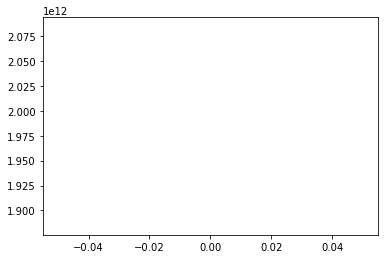

In [16]:
from matplotlib import pyplot as plt

epochs=3
batch_size = 1
learning_rate = .01
m=.5
model = AttackNet(train.x.shape[1])
criterion = torch.nn.MSELoss() 
opt = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=m)
loader = DataLoader(dataset=train, batch_size=200, shuffle=True)

out=[]
for epoch in range(epochs):
    print("Epoch begin: ", epoch)
    for x,y in loader:
        # reset optimizer
        opt.zero_grad()
        loss = criterion(model(x), y)
        loss.backward()
        opt.step()
        out.append(loss.item())

plt.plot(out)
for p in model.parameters(): print(p)

## Test

In [18]:
test = Metrics(splitted_test.dataset.x, splitted_test.dataset.y)
del splitted_test

test_loader=DataLoader(test)

NameError: name 'splitted_test' is not defined

___

In [ ]:
### reshape input data to LSTM format [samples, time_steps, features]
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print(f"shape of X_train:", X_train_lstm.shape)
print(f"shape of X_test:", X_test_lstm.shape)

In [ ]:
from tensorflow.keras import Model, Sequential, Input, backend
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

n_classes = len(le.classes_)
print(f"num of classes:{n_classes}")
n_features = X_train_lstm.shape[2]
def multiClassModel(n_features, n_classes=9):
    model = Sequential()
    model.add(Input(shape=(None, n_features)))
    model.add(LSTM(units=30))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation="softmax", name="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer='Adam')
    model.summary()
    return model

In [ ]:
# from keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=20, mode='min', restore_best_weights=True)
backend.clear_session()
model = multiClassModel(n_features, n_classes)
history = model.fit(X_train_lstm, y_train, 
                    epochs=200, batch_size=64, validation_split=0.2, callbacks=[callback])
### check the loss trend of epochs
pd.DataFrame(history.history).plot(kind='line', xlabel='epochs', figsize=(8, 6))

import matplotlib.pyplot as plt
plt.show()